In [1]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
from bokeh.plotting import figure, show
from bokeh.models import NumeralTickFormatter
from bokeh.models import ColumnDataSource
from bokeh.models import DatetimeTickFormatter
from bokeh.palettes import mpl,Spectral8
from bokeh.layouts import row, gridplot
from bokeh.core.properties import value
from bokeh.transform import dodge

In [4]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

# Load the CSV file

In [5]:
Appsinit=pd.read_csv("data.csv")

In [6]:
Appsinit.shape

(10841, 13)

In [7]:
Apps=Appsinit.dropna(subset=['Rating']).reset_index(drop=True)

In [8]:
Apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
Apps.isnull().any().any()

True

In [10]:
Apps.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [11]:
Apps.shape

(9367, 13)

In [12]:
Apps['Category'].value_counts()

FAMILY                 1747
GAME                   1097
TOOLS                   734
PRODUCTIVITY            351
MEDICAL                 350
COMMUNICATION           328
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             317
PERSONALIZATION         314
LIFESTYLE               314
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  259
SHOPPING                238
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  195
BOOKS_AND_REFERENCE     178
VIDEO_PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       65
ART_AND_DESIGN           62
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
1.9                       1
Name: Category, dtype: int64

# Remove Category '1.9' and adjust values in the row accordingly

In [13]:
Apps.loc[Apps['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9117,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [14]:
Apps.iloc[9117,1:]=Apps.iloc[9117,1:].shift(1)

In [15]:
Apps.loc[9117,'Category']='LIFESTYLE'

In [16]:
Apps.loc[9117]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                        LIFESTYLE
Rating                                                1.9
Reviews                                                19
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 9117, dtype: object

In [17]:
Apps['Category'].value_counts()

FAMILY                 1747
GAME                   1097
TOOLS                   734
PRODUCTIVITY            351
MEDICAL                 350
COMMUNICATION           328
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             317
LIFESTYLE               315
PERSONALIZATION         314
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  259
SHOPPING                238
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  195
BOOKS_AND_REFERENCE     178
VIDEO_PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       65
ART_AND_DESIGN           62
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

# Check rows with null values

In [18]:
Apps.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            1
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64

In [19]:
Apps[Apps.isnull().any(axis=1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1473,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
4280,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4308,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
5866,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6578,Dots puzzle,FAMILY,4,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
9117,Life Made WI-Fi Touchscreen Photo Frame,LIFESTYLE,1.9,19,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


In [20]:
Apps.loc[9148,'Type']='Free'
Apps.loc[10472,'Genres']='Lifestyle'

In [21]:
Apps[Apps.isnull().any(axis=1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1473,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
4280,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4308,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
5866,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6578,Dots puzzle,FAMILY,4,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
9117,Life Made WI-Fi Touchscreen Photo Frame,LIFESTYLE,1.9,19,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up
10472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lifestyle,NaN,NaN,NaN


In [22]:
Apps.drop(index=10472,inplace=True)

In [23]:
Apps.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            1
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64

In [24]:
Apps.dtypes

App               object
Category          object
Rating            object
Reviews           object
Size              object
Installs          object
Type              object
Price             object
Content Rating    object
Genres            object
Last Updated      object
Current Ver       object
Android Ver       object
dtype: object

In [25]:
Apps['Rating'].describe()

count     9367.0
unique      40.0
top          4.4
freq      1109.0
Name: Rating, dtype: float64

In [26]:
Apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [27]:
Apps['Type'].value_counts()
Apps['Installs'].value_counts()

1,000,000+        1577
10,000,000+       1252
100,000+          1150
10,000+           1010
5,000,000+         752
1,000+             714
500,000+           538
50,000+            467
5,000+             432
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

# Convert 'Rating','Price','Installs' and 'Reviews' from Object to Numeric types

In [28]:
Apps.dtypes

App               object
Category          object
Rating            object
Reviews           object
Size              object
Installs          object
Type              object
Price             object
Content Rating    object
Genres            object
Last Updated      object
Current Ver       object
Android Ver       object
dtype: object

In [29]:
Apps.Rating=Apps.Rating.astype(float)

In [30]:
Apps=Apps.rename(columns={'Price':'Price in $'})

In [31]:
Apps['Price in $']=Apps['Price in $'].str.replace('$','')

In [32]:
Apps['Price in $']=Apps['Price in $'].astype(float)

In [33]:
Apps['Reviews']=Apps['Reviews'].astype(int)

In [34]:
Apps['Installs(greater than)']=Apps['Installs'].str.replace('+','').str.replace(',','').astype(int)

In [35]:
Apps.dtypes

App                        object
Category                   object
Rating                    float64
Reviews                     int64
Size                       object
Installs                   object
Type                       object
Price in $                float64
Content Rating             object
Genres                     object
Last Updated               object
Current Ver                object
Android Ver                object
Installs(greater than)      int64
dtype: object

In [36]:
Apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price in $,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs(greater than)
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000


# Correlation between Rating, Reviews, Price and Installs 

In [37]:
Apps.corr()

,Rating,Reviews,Price in $,Installs(greater than)
Rating,1.000000,0.068147,-0.021851,0.051393
Reviews,0.068147,1.000000,-0.009819,0.641613
Price in $,-0.021851,-0.009819,1.000000,-0.011889
Installs(greater than),0.051393,0.641613,-0.011889,1.000000


<IPython.core.display.Javascript object>


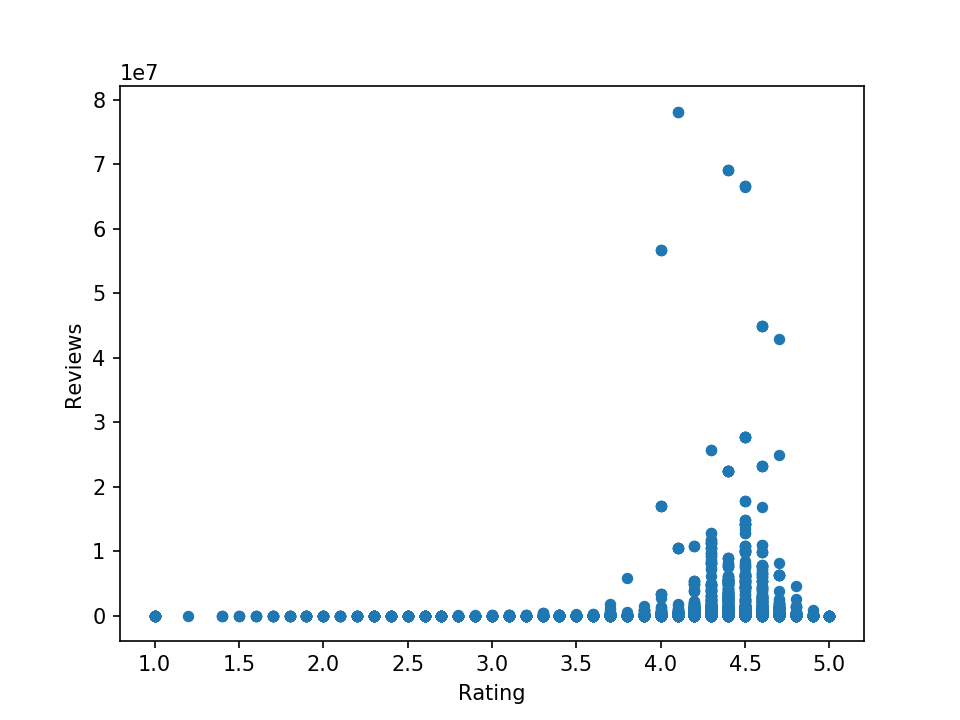

In [38]:
Apps.plot.scatter('Rating','Reviews')


<IPython.core.display.Javascript object>


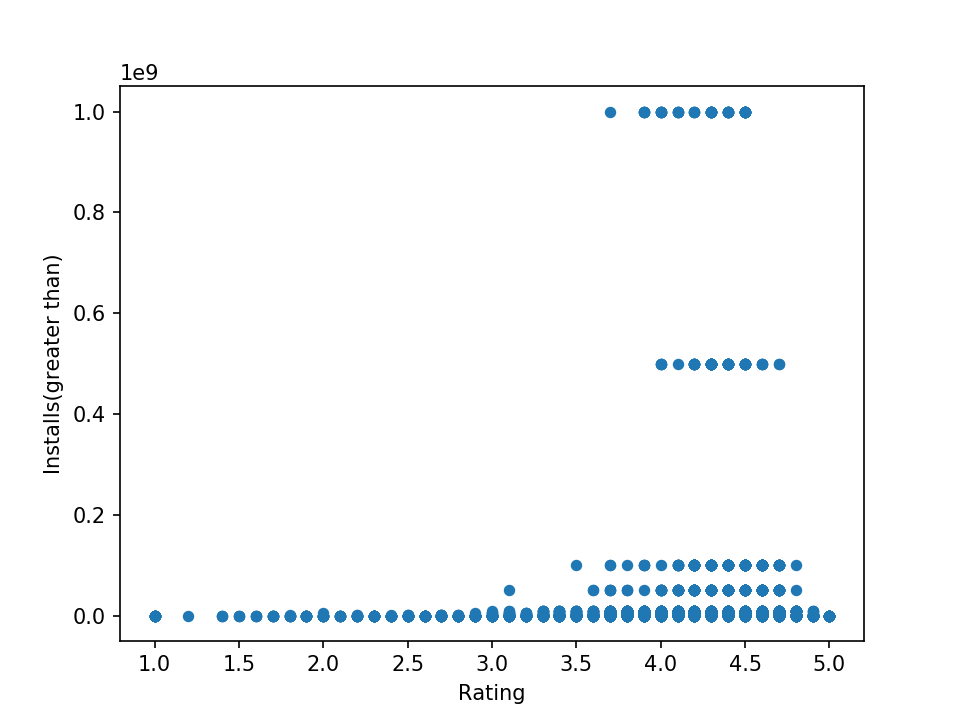

In [39]:
Apps.plot.scatter('Rating','Installs(greater than)')

<IPython.core.display.Javascript object>


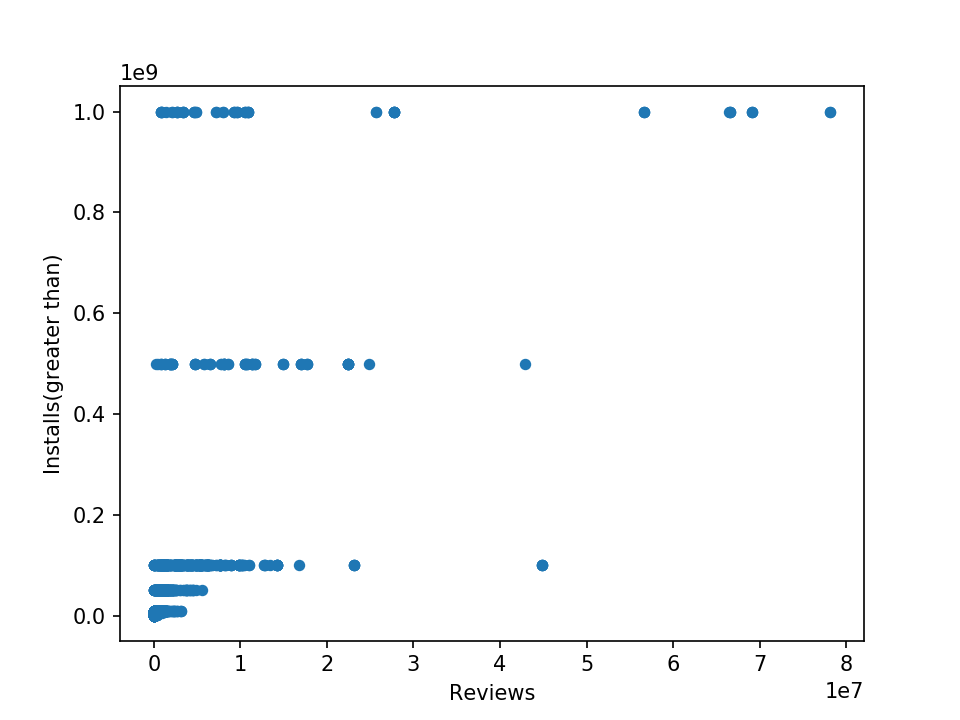

In [88]:
Apps.plot.scatter('Reviews','Installs(greater than)')

# Summary Stats within 'Free' and 'Paid' Type

In [92]:
gr_freeapps=Apps.groupby('Type')
df_typestats=gr_freeapps.describe().stack()
df_typestats.applymap('{0:,.02f}'.format)

Installs(greater than) Price in $    Rating        Reviews
Type                                                                 
Free count               8,720.00   8,720.00  8,720.00       8,720.00
     mean           19,214,967.47       0.00      4.19     551,061.10
     std            94,424,413.76       0.00      0.51   3,255,178.68
     min                     1.00       0.00      1.00           1.00
     25%                10,000.00       0.00      4.00         236.75
     50%             1,000,000.00       0.00      4.30       7,814.50
     75%             5,000,000.00       0.00      4.50      96,478.75
     max         1,000,000,000.00       0.00      5.00  78,158,306.00
Paid count                 647.00     647.00    647.00         647.00
     mean              112,739.69      13.91      4.27      14,432.77
     std               703,593.94      58.70      0.55     134,491.53
     min                     1.00       0.99      1.00           1.00
     25%                 1,000.00       1.99      4.10          33.00
     50%                 5,000.00       2.99      4.40         214.00
     75%                50,000.00       4.99      4.60       2,253.00
     max            10,000,000.00     400.00      5.00   2,376,564.00

# Type and Content Rating

In [42]:
gr_freeapps=Apps.groupby('Type')
gr_freeapps['Content Rating'].value_counts().plot(kind='bar')

In [43]:
gr_typeCR=Apps.groupby(['Type','Content Rating'])

<IPython.core.display.Javascript object>


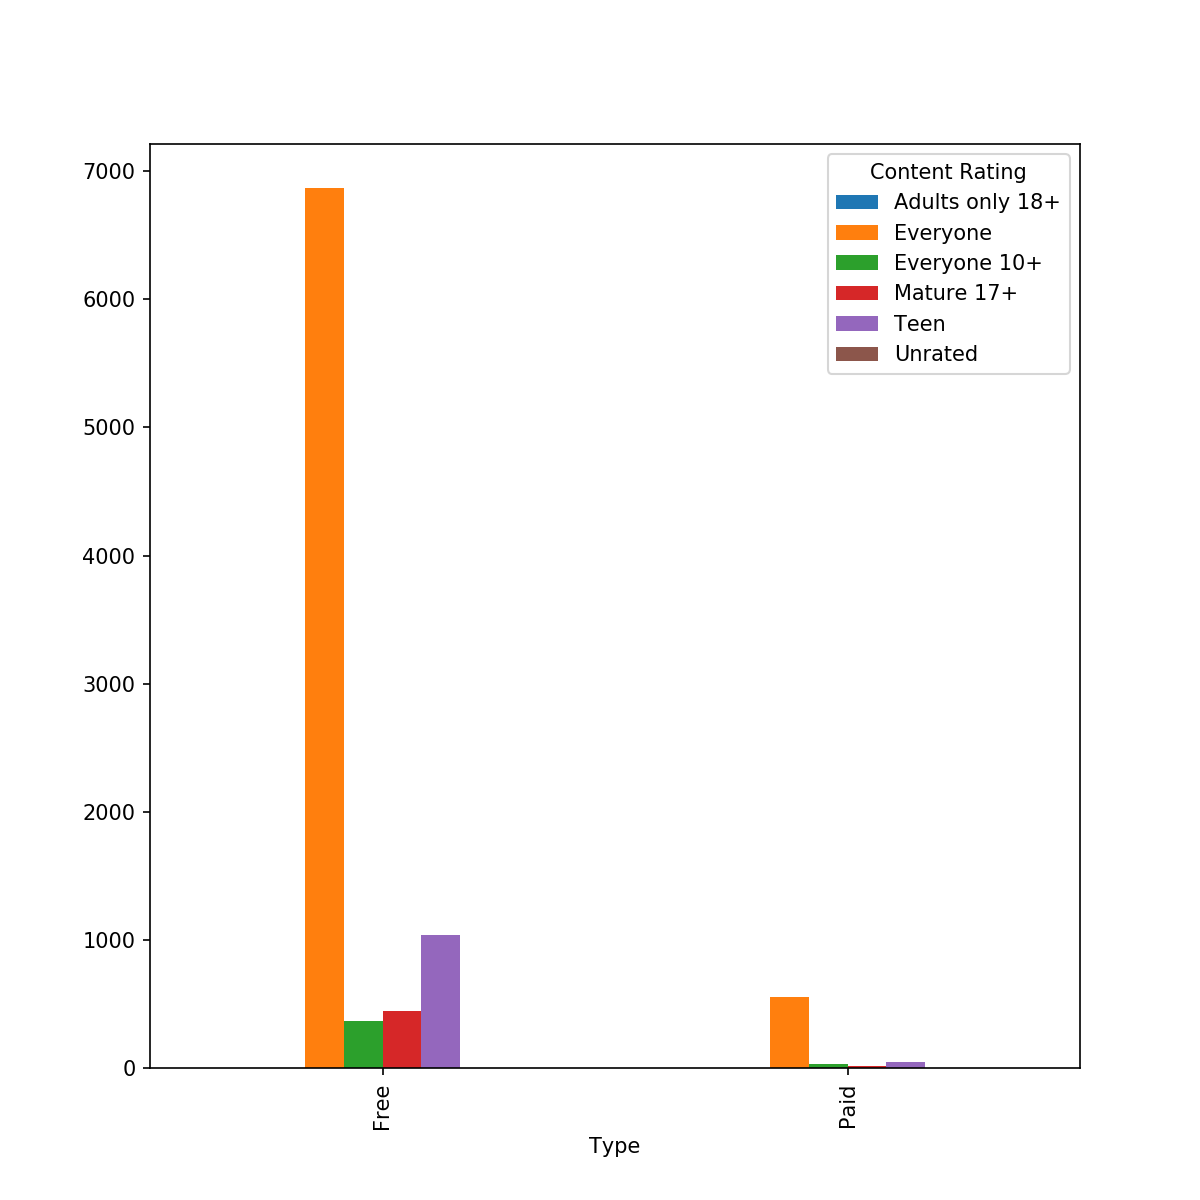

In [44]:
gr_typeCR['App'].count().unstack().plot(kind='bar',figsize=(8,8))

# Type and Category

In [45]:
gr_typecat=Apps.groupby(['Type','Category'])

In [46]:
df_typecat=gr_typecat['Category'].agg([('Count','count')])

In [47]:
df_typecat

Count
Type Category                  
Free ART_AND_DESIGN          59
     AUTO_AND_VEHICLES       72
     BEAUTY                  42
     BOOKS_AND_REFERENCE    170
     BUSINESS               292
     COMICS                  58
     COMMUNICATION          306
     DATING                 191
     EDUCATION              151
     ENTERTAINMENT          147
     EVENTS                  45
     FAMILY                1585
     FINANCE                310
     FOOD_AND_DRINK         107
     GAME                  1020
     HEALTH_AND_FITNESS     285
     HOUSE_AND_HOME          76
     LIBRARIES_AND_DEMO      65
     LIFESTYLE              297
     MAPS_AND_NAVIGATION    119
     MEDICAL                262
     NEWS_AND_MAGAZINES     231
     PARENTING               48
     PERSONALIZATION        247
     PHOTOGRAPHY            299
     PRODUCTIVITY           333
     SHOPPING               236
     SOCIAL                 257
     SPORTS                 297
     TOOLS                  671
...                         ...
     VIDEO_PLAYERS          156
     WEATHER                 68
Paid ART_AND_DESIGN           3
     AUTO_AND_VEHICLES        1
     BOOKS_AND_REFERENCE      8
     BUSINESS                11
     COMMUNICATION           22
     DATING                   4
     EDUCATION                4
     ENTERTAINMENT            2
     FAMILY                 162
     FINANCE                 13
     FOOD_AND_DRINK           2
     GAME                    77
     HEALTH_AND_FITNESS      12
     LIFESTYLE               18
     MAPS_AND_NAVIGATION      5
     MEDICAL                 88
     NEWS_AND_MAGAZINES       2
     PARENTING                2
     PERSONALIZATION         67
     PHOTOGRAPHY             18
     PRODUCTIVITY            18
     SHOPPING                 2
     SOCIAL                   2
     SPORTS                  22
     TOOLS                   63
     TRAVEL_AND_LOCAL         8
     VIDEO_PLAYERS            4
     WEATHER                  7

[61 rows x 1 columns]

In [48]:
res_top5=df_typecat['Count'].groupby(level=0,group_keys=False).nlargest(5)

In [49]:
res_top5

Type  Category       
Free  FAMILY             1585
      GAME               1020
      TOOLS               671
      PRODUCTIVITY        333
      FINANCE             310
Paid  FAMILY              162
      MEDICAL              88
      GAME                 77
      PERSONALIZATION      67
      TOOLS                63
Name: Count, dtype: int64

In [50]:
Apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price in $,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs(greater than)
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000


# Average Reviews w.r.t. Type 

In [51]:
Apps['Reviews'].mean()

513994.959752322

In [52]:
gr_freeapps['Reviews'].mean()

Type
Free    551061.099541
Paid     14432.766615
Name: Reviews, dtype: float64

# Average Rating w.r.t. Type

In [53]:
Apps['Rating'].mean()

4.191512757553112

In [54]:
gr_freeapps['Rating'].mean()

Type
Free    4.185940
Paid    4.266615
Name: Rating, dtype: float64

In [55]:
gr_cat=Apps.groupby('Category')

In [56]:
cat=gr_cat['Category'].agg([('Count','count')])

In [57]:
typecat=gr_typecat['Category'].agg([('Count','count')]).swaplevel(0,1).sort_index(level=0)
typecat

Count
Category            Type       
ART_AND_DESIGN      Free     59
                    Paid      3
AUTO_AND_VEHICLES   Free     72
                    Paid      1
BEAUTY              Free     42
BOOKS_AND_REFERENCE Free    170
                    Paid      8
BUSINESS            Free    292
                    Paid     11
COMICS              Free     58
COMMUNICATION       Free    306
                    Paid     22
DATING              Free    191
                    Paid      4
EDUCATION           Free    151
                    Paid      4
ENTERTAINMENT       Free    147
                    Paid      2
EVENTS              Free     45
FAMILY              Free   1585
                    Paid    162
FINANCE             Free    310
                    Paid     13
FOOD_AND_DRINK      Free    107
                    Paid      2
GAME                Free   1020
                    Paid     77
HEALTH_AND_FITNESS  Free    285
                    Paid     12
HOUSE_AND_HOME      Free     76
...                         ...
LIFESTYLE           Free    297
                    Paid     18
MAPS_AND_NAVIGATION Free    119
                    Paid      5
MEDICAL             Free    262
                    Paid     88
NEWS_AND_MAGAZINES  Free    231
                    Paid      2
PARENTING           Free     48
                    Paid      2
PERSONALIZATION     Free    247
                    Paid     67
PHOTOGRAPHY         Free    299
                    Paid     18
PRODUCTIVITY        Free    333
                    Paid     18
SHOPPING            Free    236
                    Paid      2
SOCIAL              Free    257
                    Paid      2
SPORTS              Free    297
                    Paid     22
TOOLS               Free    671
                    Paid     63
TRAVEL_AND_LOCAL    Free    218
                    Paid      8
VIDEO_PLAYERS       Free    156
                    Paid      4
WEATHER             Free     68
                    Paid      7

[61 rows x 1 columns]

In [58]:
#pcttype=typecat.div(cat,level='Category')*100

In [59]:
catrat=gr_cat['Rating'].agg([('AvgRating','mean')]).sort_values(by='AvgRating',ascending=False)
catrat

,AvgRating
Category,
EVENTS,4.435556
EDUCATION,4.389032
ART_AND_DESIGN,4.358065
BOOKS_AND_REFERENCE,4.346067
PERSONALIZATION,4.335987
PARENTING,4.300000
GAME,4.286326
BEAUTY,4.278571
HEALTH_AND_FITNESS,4.277104


In [60]:
tab_cattype=pd.crosstab(Apps['Category'],Apps['Type'])
tab_cattype

Type,Free,Paid
Category,,
ART_AND_DESIGN,59,3
AUTO_AND_VEHICLES,72,1
BEAUTY,42,0
BOOKS_AND_REFERENCE,170,8
BUSINESS,292,11
COMICS,58,0
COMMUNICATION,306,22
DATING,191,4
EDUCATION,151,4


In [61]:
tab_cattype=tab_cattype.div(tab_cattype.sum(1),axis=0)
tab_cattype

Type,Free,Paid
Category,,
ART_AND_DESIGN,0.951613,0.048387
AUTO_AND_VEHICLES,0.986301,0.013699
BEAUTY,1.000000,0.000000
BOOKS_AND_REFERENCE,0.955056,0.044944
BUSINESS,0.963696,0.036304
COMICS,1.000000,0.000000
COMMUNICATION,0.932927,0.067073
DATING,0.979487,0.020513
EDUCATION,0.974194,0.025806


In [62]:
res_rat=pd.merge(catrat,tab_cattype[['Free']],right_on='Category',left_index=True)

In [63]:
Apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price in $,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs(greater than)
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000


In [64]:
gr_paidcat=Apps[Apps['Type']=='Paid'].groupby('Category')
ser_paidcat=gr_paidcat['Price in $'].mean()

In [65]:
pd.concat([res_rat,ser_paidcat],axis=1,sort=False)

,AvgRating,Free,Price in $
EVENTS,4.435556,1.000000,NaN
EDUCATION,4.389032,0.974194,4.490000
ART_AND_DESIGN,4.358065,0.951613,1.990000
BOOKS_AND_REFERENCE,4.346067,0.955056,2.985000
PERSONALIZATION,4.335987,0.786624,1.906866
PARENTING,4.300000,0.960000,4.790000
GAME,4.286326,0.929809,3.641039
BEAUTY,4.278571,1.000000,NaN
HEALTH_AND_FITNESS,4.277104,0.959596,3.781667
SHOPPING,4.259664,0.991597,2.740000


# App that sells for the highest price

In [66]:
df_maxprice=gr_paidcat['Price in $','App'].agg({'Price in $':'max'}).rename(columns={'Price in $':'Highest'})
df_maxprice.columns=df_maxprice.columns.droplevel(0)

In [67]:
df_minprice=gr_paidcat['Price in $','App'].agg({'Price in $':'min'}).rename(columns={'Price in $':'Lowest'})
df_minprice.columns=df_minprice.columns.droplevel(0)

In [68]:
formatmap={'Highest':'${0:.0f}',
           'Lowest':'${0:.0f}'}

In [69]:
df_maxmin=pd.concat([df_maxprice,df_minprice],axis=1).sort_values(by=['Highest'],ascending=False)
df_maxmin[['Highest','Lowest']]=df_maxmin[['Highest','Lowest']].applymap('${0:.0f}'.format)
df_maxmin[:5]

,Highest,App,Lowest,App
Category,,,,
LIFESTYLE,$400,💎 I'm rich,$1,A41 WatchFace for Android Wear Smart Watch
FAMILY,$400,"sugar, sugar",$1,30WPM Amateur ham radio Koch CW Morse code tra...
FINANCE,$400,Ray Financial Calculator Pro,$2,BA Pro Financial Calculator
MEDICAL,$80,palmPEDi: Pediatric Tape,$1,2017 EMRA Antibiotic Guide
SPORTS,$30,iHunter BC,$1,Absolute RC Heli Simulator


In [70]:
df_paidcat=gr_paidcat['Reviews'].agg([('AvgReviews','mean')]).sort_values(by='AvgReviews').applymap('{0:,.0f}'.format)
df_paidcat[:5]

,AvgReviews
Category,
NEWS_AND_MAGAZINES,100
SOCIAL,121
BOOKS_AND_REFERENCE,220
SHOPPING,242
MEDICAL,370


In [71]:
df_paidcat[-5:]

,AvgReviews
Category,
PRODUCTIVITY,"9,532"
PHOTOGRAPHY,"12,814"
WEATHER,"19,489"
GAME,"20,668"
FAMILY,"37,324"


In [72]:
Apps.dtypes

App                        object
Category                   object
Rating                    float64
Reviews                     int64
Size                       object
Installs                   object
Type                       object
Price in $                float64
Content Rating             object
Genres                     object
Last Updated               object
Current Ver                object
Android Ver                object
Installs(greater than)      int64
dtype: object

In [73]:
Apps.corr()

,Rating,Reviews,Price in $,Installs(greater than)
Rating,1.000000,0.068147,-0.021851,0.051393
Reviews,0.068147,1.000000,-0.009819,0.641613
Price in $,-0.021851,-0.009819,1.000000,-0.011889
Installs(greater than),0.051393,0.641613,-0.011889,1.000000


In [74]:
df_ratingdesc=gr_freeapps['Rating'].describe()
df_ratingdesc.columns.name='Rating'
df_ratingdesc.applymap('{0:,.1f}'.format)

Rating,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Free,"8,720.0",4.2,0.5,1.0,4.0,4.3,4.5,5.0
Paid,647.0,4.3,0.5,1.0,4.1,4.4,4.6,5.0


In [75]:
df_ratingdesc['count']

Type
Free    8720.0
Paid     647.0
Name: count, dtype: float64

In [76]:
gr_freeapps.corr()

Installs(greater than)  Price in $    Rating  \
Type                                                                        
Free Installs(greater than)                1.000000         NaN  0.055800   
     Price in $                                 NaN         NaN       NaN   
     Rating                                0.055800         NaN  1.000000   
     Reviews                               0.640841         NaN  0.072742   
Paid Installs(greater than)                1.000000   -0.023467  0.059029   
     Price in $                           -0.023467    1.000000 -0.112951   
     Rating                                0.059029   -0.112951  1.000000   
     Reviews                               0.867299   -0.015015  0.043467   

                              Reviews  
Type                                   
Free Installs(greater than)  0.640841  
     Price in $                   NaN  
     Rating                  0.072742  
     Reviews                 1.000000  
Paid Installs(greater than)  0.867299  
     Price in $             -0.015015  
     Rating                  0.043467  
     Reviews                 1.000000

In [78]:
df_freerat=Apps[Apps['Type']=='Free']
df_paidrat=Apps[Apps['Type']=='Paid']

In [80]:
freehist,freeedges=np.histogram(df_freerat.Rating,bins=4)
paidhist,paidedges=np.histogram(df_paidrat.Rating,bins=4)
freep=figure(title='Ratings of Free Apps',width=400,height=600)
paidp=figure(title='Ratings of Paid Apps',width=400,height=600)
freep.quad(top=freehist,bottom=0,left=freeedges[:-1],right=freeedges[1:],color='Indigo')
freep.xaxis.axis_label='Rating'
freep.yaxis.axis_label='Number of Apps'
paidp.quad(top=paidhist,bottom=0,left=paidedges[:-1],right=paidedges[1:],color='Deeppink')
paidp.xaxis.axis_label='Rating'
paidp.yaxis.axis_label='Number of Apps'
grid=gridplot([freep,paidp],ncols=2)
show(grid)

# Summary stats w.r.t. Content Rating

In [ ]:
gr_CR=Apps.groupby('Content Rating')
df_CR=gr_CR['Rating','Reviews','Price in $','Installs(greater than)'].mean()
df_CR.applymap('{0:,.02f}'.format)

<IPython.core.display.Javascript object>


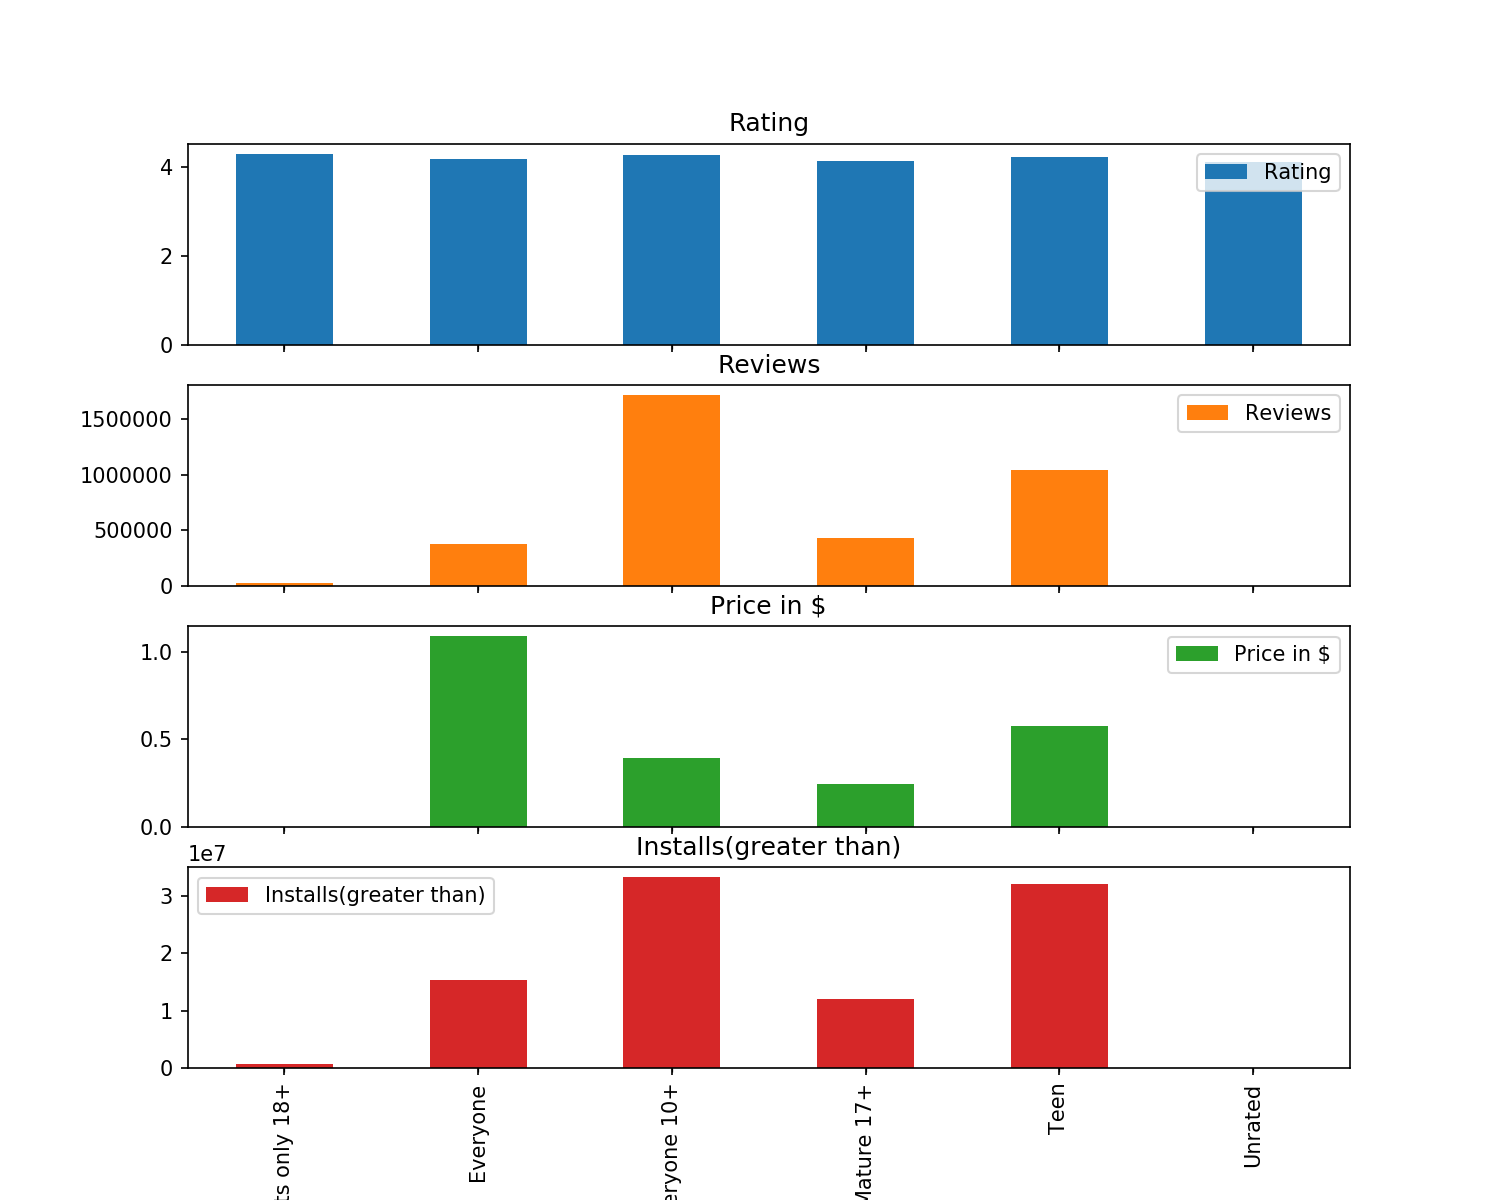

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9f2967f60>,
      dtype=object)

In [82]:
df_CR.plot(kind='bar',subplots=True, figsize=(10,8))

# Boxplot of Ratings w.r.t. Categories

<IPython.core.display.Javascript object>


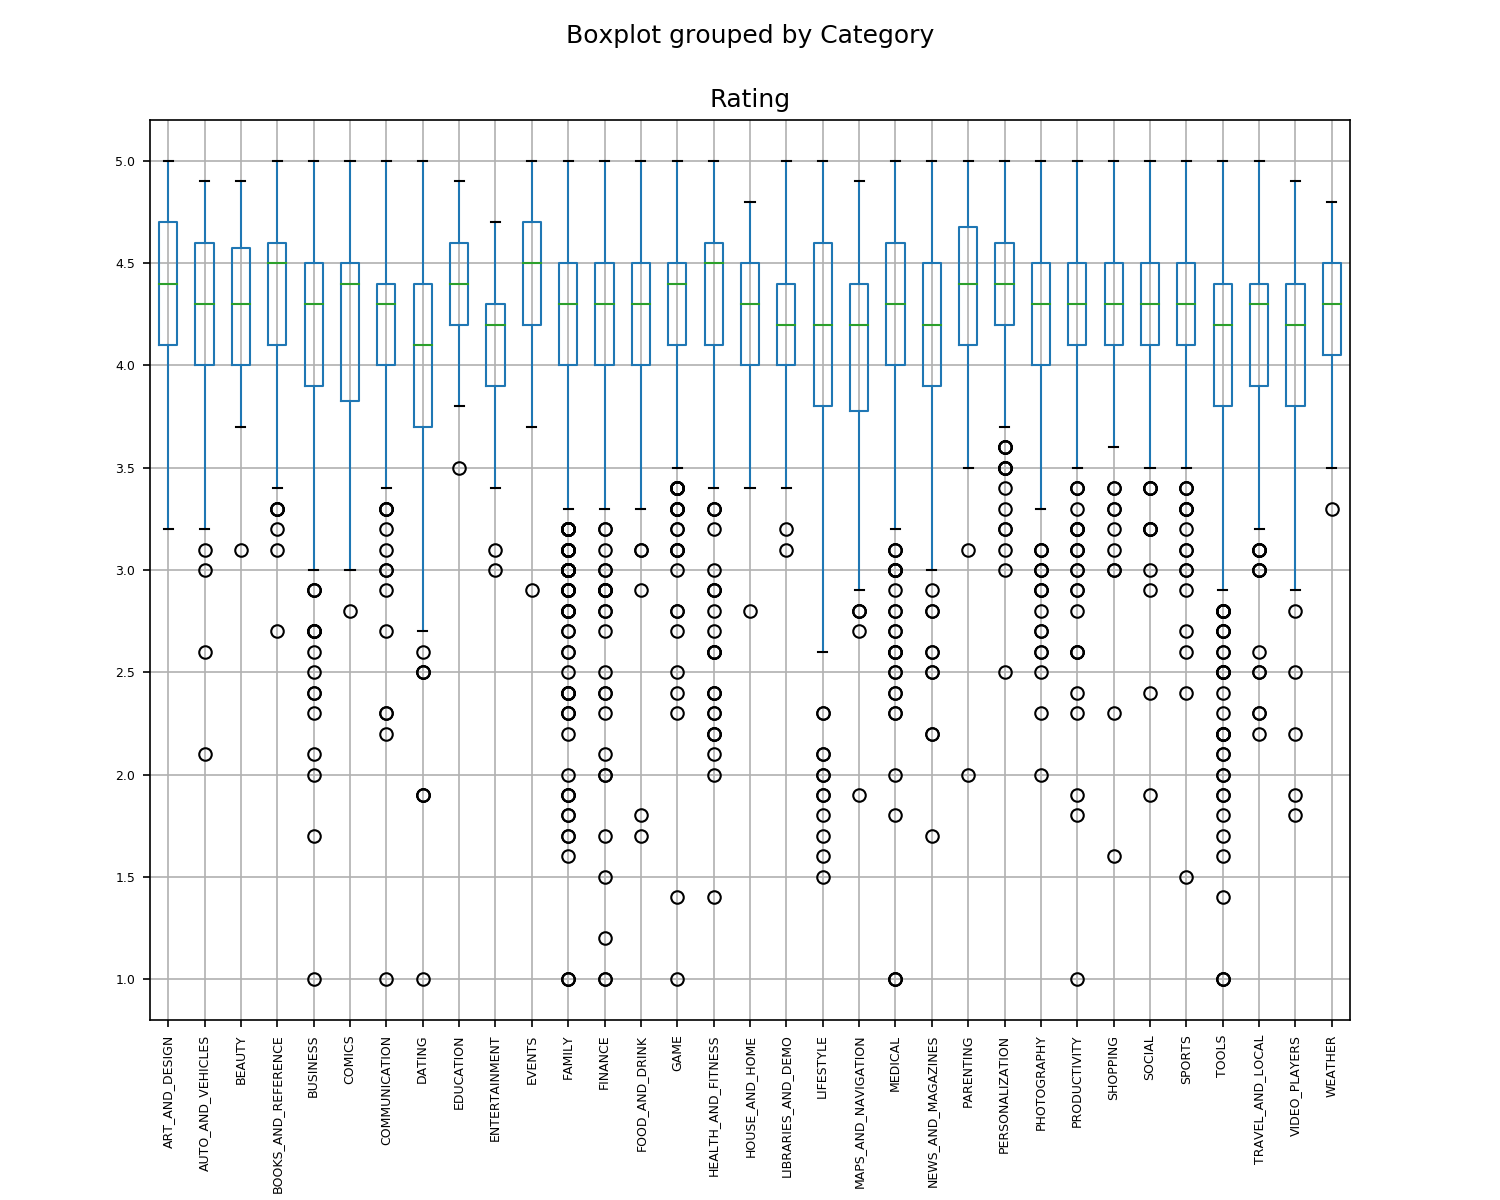

In [83]:
Apps.boxplot(column='Rating',by='Category',rot=90,fontsize=6,figsize=(10,8))

# Apps which fall in the highest level of Installs

In [84]:
max_installs=Apps['Installs(greater than)'].max()

In [85]:
df_maxinstalls=Apps[Apps['Installs(greater than)']==max_installs].groupby('Category')[['App']].count().sort_values(by='App',ascending=False)

In [86]:
Apps[Apps['Installs(greater than)']==max_installs].shape

(58, 14)

In [87]:
p=figure(title='Apps with Installs greater than 1,000,000,000', height=500,width=600,x_range=list(df_maxinstalls.index))
p.vbar(x=list(df_maxinstalls.index),top=list(df_maxinstalls['App'].values),width=0.5,color='Olive')
p.xaxis.major_label_orientation=45
p.xaxis.axis_label='Category'
p.yaxis.axis_label='Number of Apps'
show(p)